## Final Take Home Challenge - Thinkful Bootcamp

In [118]:
#Import necessary modules

import requests
from bs4 import BeautifulSoup
import urllib.request
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import scipy.stats as stats
import statistics as stat
import sklearn
from sklearn.preprocessing import LabelEncoder
from sklearn.svm import SVR
from sklearn.model_selection import cross_val_score
from sklearn import neighbors
from sklearn import ensemble
from sklearn import linear_model
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVR
from sklearn.svm import SVC
from sklearn.neighbors import KNeighborsClassifier
from sklearn.naive_bayes import BernoulliNB
from sklearn import preprocessing
from sklearn.metrics import confusion_matrix
from sklearn.feature_selection import RFE
from sklearn.decomposition import PCA
from sklearn.preprocessing import normalize
from sklearn.cluster import KMeans
from sklearn.cluster import MeanShift, estimate_bandwidth
%matplotlib inline

## Import Data Source & Explore Characteristics

In [119]:
#Read in from CSV
purchases = pd.read_csv('https://raw.githubusercontent.com/Thinkful-Ed/data-201-resources/master/customers_data.csv')

In [120]:
#First glimpse at the dataset
purchases.head(10)

,Unnamed: 0,purch_amt,gender,card_on_file,age,days_since_last_purch,loyalty
0,0,19.58,male,no,31.0,35.0,False
1,1,65.16,male,yes,23.0,61.0,False
2,2,40.60,female,no,36.0,49.0,False
3,3,38.01,male,yes,47.0,57.0,False
4,4,22.32,female,yes,5.0,39.0,False
5,5,39.66,female,no,6.0,79.0,False
6,6,43.96,male,yes,36.0,64.0,False
7,7,6.09,female,yes,36.0,67.0,False
8,8,25.89,female,no,28.0,53.0,False
9,9,93.63,female,no,40.0,47.0,True


In [121]:
#Take a look at the shape of our dataset
print('Dataset contains {} rows, across {} columns'.format(purchases.shape[0], purchases.shape[1]))

Dataset contains 120000 rows, across 7 columns


In [122]:
#Describe our numeric-based columns
purchases.describe()

,Unnamed: 0,purch_amt,age,days_since_last_purch
count,120000.000000,120000.000000,120000.000000,120000.000000
mean,59999.500000,44.036234,25.803008,56.605908
std,34641.160489,20.473148,10.153072,16.422187
min,0.000000,-43.950000,-22.000000,-9.000000
25%,29999.750000,30.210000,19.000000,45.000000
50%,59999.500000,43.970000,26.000000,57.000000
75%,89999.250000,57.830000,33.000000,68.000000
max,119999.000000,142.200000,71.000000,125.000000


In [123]:
#Understand the current datatypes of our dataset
purchases.dtypes

Unnamed: 0                 int64
purch_amt                float64
gender                    object
card_on_file              object
age                      float64
days_since_last_purch    float64
loyalty                     bool
dtype: object

## Exploratory Analysis

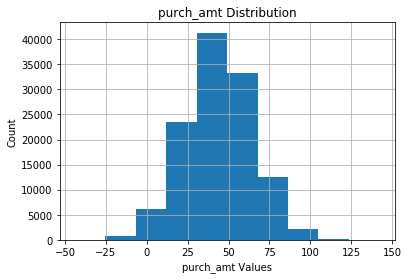

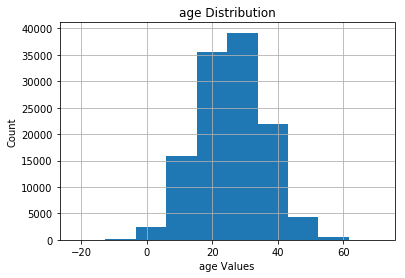

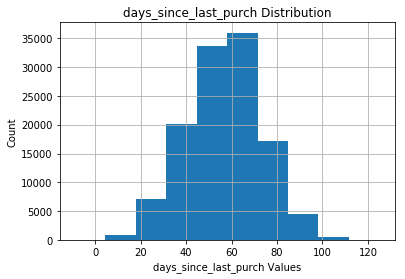

In [124]:
# Plot histograms for all continuous data
for col in purchases.dtypes[purchases.dtypes == 'float64'].index:
    purchases[col].hist()
    plt.title(col + " Distribution")
    plt.xlabel(col + " Values")
    plt.ylabel("Count")
    plt.show()

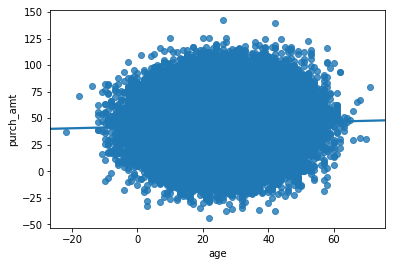

In [125]:
#Age vs Purchase Amount
sns.regplot(x=purchases['age'], y=purchases['purch_amt'])
plt.show()

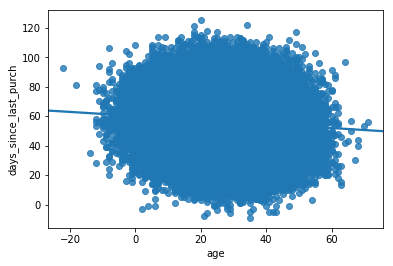

In [126]:
#Age vs. Days Since Last Purchase
sns.regplot(x=purchases['age'], y=purchases['days_since_last_purch'])
plt.show()

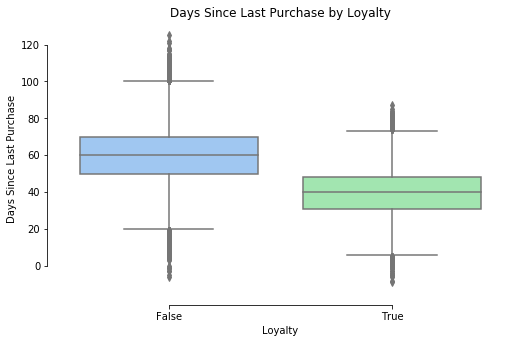

In [127]:
# Days Since Last Purchase - Loyalty, No Loyalty

plt.figure(figsize=[8,5])
ax = sns.boxplot(x='loyalty',y='days_since_last_purch', data=purchases, palette='pastel')  
plt.title('Days Since Last Purchase by Loyalty')
sns.despine(offset=10, trim=True)
ax.set(xlabel='Loyalty', ylabel='Days Since Last Purchase')
plt.show()

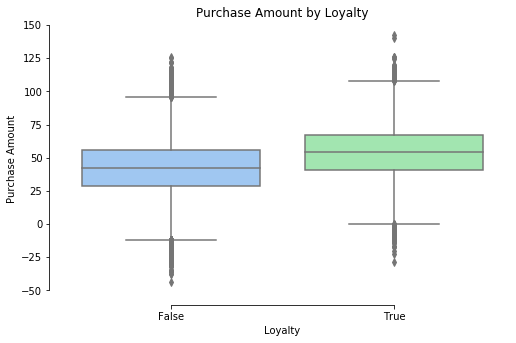

In [128]:
#Purchase Amount - Loyalty, No Loyalty

plt.figure(figsize=[8,5])
ax = sns.boxplot(x='loyalty',y='purch_amt', data=purchases, palette='pastel')  
plt.title('Purchase Amount by Loyalty')
sns.despine(offset=10, trim=True)
ax.set(xlabel='Loyalty', ylabel='Purchase Amount')
plt.show()

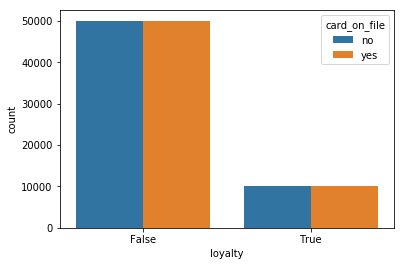

In [129]:
sns.countplot(x='loyalty', hue='card_on_file', data=purchases)
plt.show()

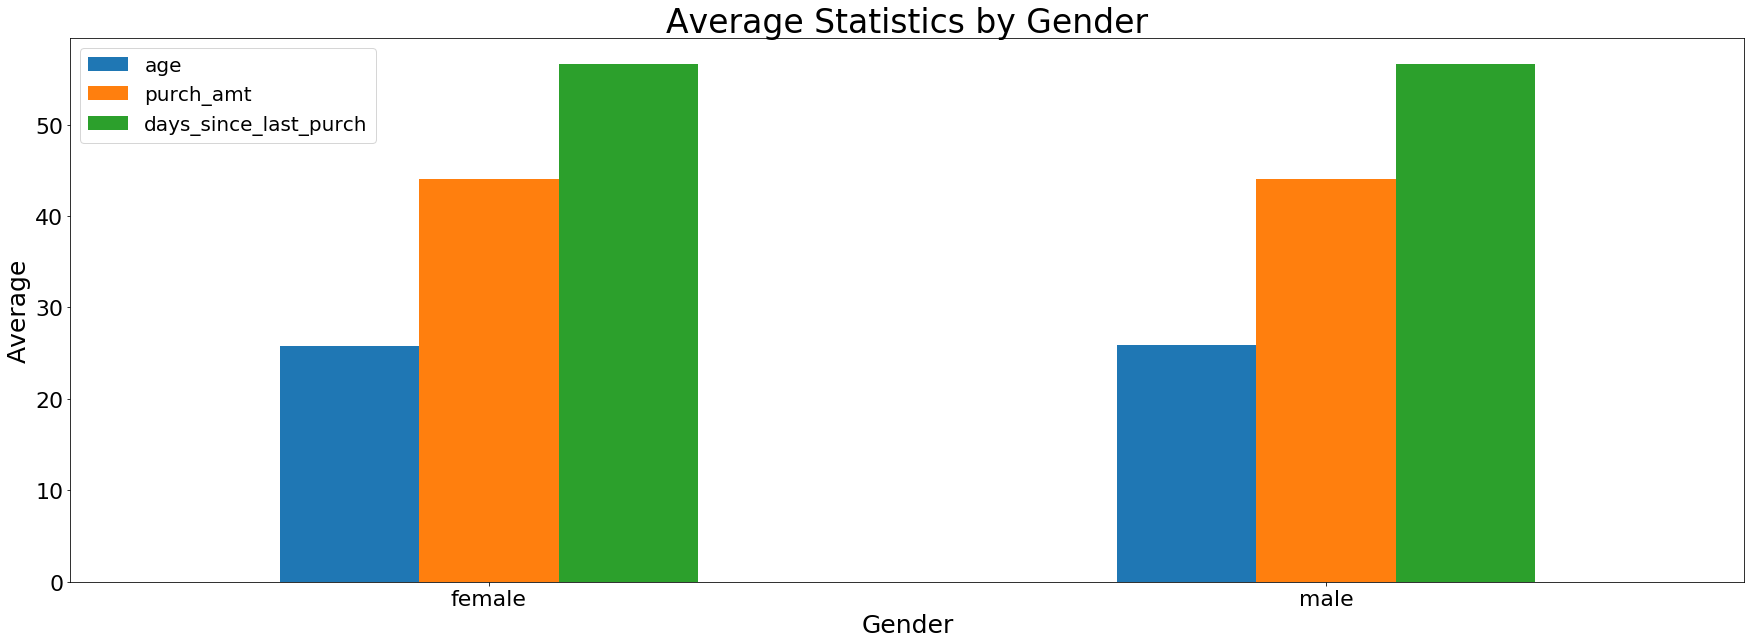

In [130]:
#For Men/Women, Average Purchase Amount, Days Since Last Purchase, and Age

summary_gender = purchases[['gender', 'age', 'purch_amt', 'days_since_last_purch']].groupby('gender').mean()

#Set plot preferences and show plot
summary_gender.plot.bar(figsize=(30, 10))
plt.legend(fontsize=20)
plt.title('Average Statistics by Gender', fontsize=33)
plt.xlabel('Gender', fontsize=25)
plt.ylabel('Average', fontsize=25)
plt.xticks(fontsize=22, rotation='horizontal')
plt.yticks(fontsize=22)
plt.show()

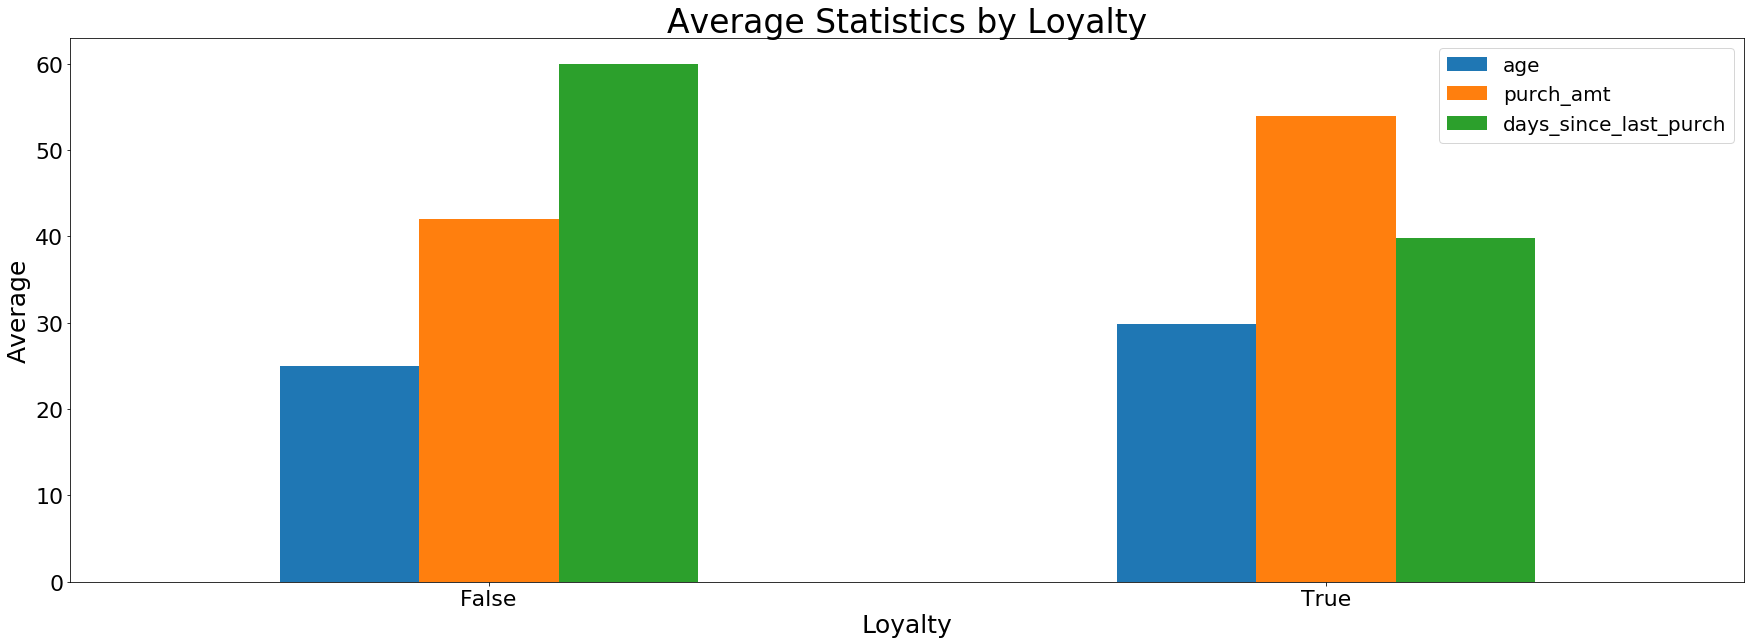

In [131]:
#For Loyalty/No Loyalty, Average Purchase Amount, Days Since Last Purchase, and Age

summary_loyalty = purchases[['loyalty', 'age', 'purch_amt', 'days_since_last_purch']].groupby('loyalty').mean()

#Set plot preferences and show plot
summary_loyalty.plot.bar(figsize=(30, 10))
plt.legend(fontsize=20)
plt.title('Average Statistics by Loyalty', fontsize=33)
plt.xlabel('Loyalty', fontsize=25)
plt.ylabel('Average', fontsize=25)
plt.xticks(fontsize=22, rotation='horizontal')
plt.yticks(fontsize=22)
plt.show()

## Data Cleaning

In [132]:
#Find Missing Data by Column
missing_values_count = purchases.isnull().sum()
print(missing_values_count)

Unnamed: 0               0
purch_amt                0
gender                   0
card_on_file             0
age                      0
days_since_last_purch    0
loyalty                  0
dtype: int64


In [133]:
#Remove ID column, not necessary
purchases = purchases.drop(purchases.columns[0], axis=1)

In [134]:
#Remove negative numbers from columns - age, purchase amount, days since last purchase
days_since_lower = round(purchases.days_since_last_purch.quantile(0.02), 2)
days_since_upper = round(purchases.days_since_last_purch.quantile(0.98), 2)

age_lower = round(purchases.age.quantile(0.02), 2)
age_upper = round(purchases.age.quantile(0.98), 2)

purch_amt_lower = round(purchases.purch_amt.quantile(0.02), 2)
purch_amt_upper = round(purchases.purch_amt.quantile(0.98), 2)

print('For days since last purchase, remove data less than {} and greater than {}'.format(days_since_lower, days_since_upper))
print('For age, remove data less than {} and greater than {}'.format(age_lower, age_upper))
print('For purchase amount, remove data less than {} and greater than {}'.format(purch_amt_lower, purch_amt_upper))

For days since last purchase, remove data less than 23.0 and greater than 90.0
For age, remove data less than 5.0 and greater than 47.0
For purchase amount, remove data less than 2.19 and greater than 86.16


In [135]:
#Make changes to days since last purch
purchases = purchases[purchases['days_since_last_purch'] >= 23.0]
purchases = purchases[purchases['days_since_last_purch'] <= 90.0]

In [136]:
#Make changes to age
purchases = purchases[purchases['age'] >= 5.0]

In [137]:
#Make changes to purchase amount
purchases = purchases[purchases['purch_amt'] >= 2.19]

## Feature Engineering

In [138]:
#Quick look at our numeric features after cleaning
purchases.describe()

,purch_amt,age,days_since_last_purch
count,111380.000000,111380.000000,111380.000000
mean,44.968928,26.211268,56.608754
std,19.384198,9.653660,14.870534
min,2.190000,5.000000,23.000000
25%,31.117500,19.000000,46.000000
50%,44.430000,26.000000,57.000000
75%,58.060000,33.000000,67.000000
max,142.200000,71.000000,90.000000


In [139]:
#Add new features (recent purchase, large purchase, purch_amt squared)
purchases['recent_purchase'] = np.where((purchases['days_since_last_purch'] < 57.0), 1, 0)
purchases['large_purchase'] = np.where((purchases['purch_amt'] > 44.43), 1, 0)
purchases['purch_amt_squared'] = purchases['purch_amt']**2

In [140]:
purchases.head(10)

,purch_amt,gender,card_on_file,age,days_since_last_purch,loyalty,recent_purchase,large_purchase,purch_amt_squared
0,19.58,male,no,31.0,35.0,False,1,0,383.3764
1,65.16,male,yes,23.0,61.0,False,0,1,4245.8256
2,40.60,female,no,36.0,49.0,False,1,0,1648.3600
3,38.01,male,yes,47.0,57.0,False,0,0,1444.7601
4,22.32,female,yes,5.0,39.0,False,1,0,498.1824
5,39.66,female,no,6.0,79.0,False,0,0,1572.9156
6,43.96,male,yes,36.0,64.0,False,0,0,1932.4816
7,6.09,female,yes,36.0,67.0,False,0,0,37.0881
8,25.89,female,no,28.0,53.0,False,1,0,670.2921
9,93.63,female,no,40.0,47.0,True,1,1,8766.5769


In [141]:
#Binarize categoricals
purchases['gender'] = np.where((purchases['gender'] == 'male'), 1, 0)
purchases['card_on_file'] = np.where((purchases['card_on_file'] == 'yes'), 1, 0)
purchases['loyalty'] = np.where((purchases['loyalty'] == True), 1, 0)

In [142]:
#Final look at df before model building
purchases.head(10)

,purch_amt,gender,card_on_file,age,days_since_last_purch,loyalty,recent_purchase,large_purchase,purch_amt_squared
0,19.58,1,0,31.0,35.0,0,1,0,383.3764
1,65.16,1,1,23.0,61.0,0,0,1,4245.8256
2,40.60,0,0,36.0,49.0,0,1,0,1648.3600
3,38.01,1,1,47.0,57.0,0,0,0,1444.7601
4,22.32,0,1,5.0,39.0,0,1,0,498.1824
5,39.66,0,0,6.0,79.0,0,0,0,1572.9156
6,43.96,1,1,36.0,64.0,0,0,0,1932.4816
7,6.09,0,1,36.0,67.0,0,0,0,37.0881
8,25.89,0,0,28.0,53.0,0,1,0,670.2921
9,93.63,0,0,40.0,47.0,1,1,1,8766.5769


## Model Building

In [143]:
#Calculate baseline accuracy for Loyalty
loyalty = purchases['loyalty'].sum()
print('Baseline accuracy for Loyalty is: ' + str(round((loyalty/purchases.shape[0])*100, 2)) + '%')

Baseline accuracy for Loyalty is: 16.27%


In [144]:
#For modeling purposes, reduce size of dataset
purchases = purchases.sample(n=20000)

**Deal with Class Imbalance**

In [145]:
#Create dataframe of only loyalty (yes) observations
loyalty_yes = purchases[purchases['loyalty'] == 1]

#Confirm number of loyalty observations
print(len(loyalty_yes))

3227


In [146]:
#Create dataframe of only loyalty (no), then take a sample
loyalty_no = purchases[purchases['loyalty'] == 0]
loyalty_no = loyalty_no.sample(n = 3227)

#Confirm number of non-loyalty observations
print(len(loyalty_no))

3227


In [147]:
#Combine our two dataframes (loyalty and non-loyalty) into one
purchases_revised = loyalty_yes.append(loyalty_no)

**Establish X and Y now that Baseline is 50/50**

In [148]:
#Establish X and Y
X = purchases_revised.drop(['loyalty'], 1)
Y = purchases_revised.loyalty

In [149]:
#Create function for tuning parameters
def tuned_params(model):
        if model == 'KNN':
                KNN = np.arange(1, 501, 100)
                KNN_df = pd.DataFrame()
                for i in KNN:
                    KNN_model = KNeighborsClassifier(n_neighbors=i, weights='distance')
                    KNN_model.fit(X, Y)
                    positive_pred = KNN_model.predict(X)
                    cross_val = cross_val_score(KNN_model, X, Y, cv=5).mean()*100
                    score = KNN_model.score(X, Y)*100
                    KNN_df_temp = pd.DataFrame({'K': i, 'training': score, 'test': cross_val}, index=[0])
                    KNN_df = KNN_df.append(KNN_df_temp)
                plt.plot(KNN_df['K'], KNN_df['training'], color = 'r', linewidth = 3, label='Training')
                plt.plot(KNN_df['K'], KNN_df['test'], color = 'b', linewidth = 3, label='Test')
                plt.xlabel('K Parameter')
                plt.title('KNN - Training vs. Test')
                plt.show()
                
        elif model == 'Random Forest':
                random_forest = np.arange(100, 500, 100)
                random_forest_df = pd.DataFrame()
                for i in random_forest:
                    rfc = ensemble.RandomForestClassifier(n_estimators=i)
                    rfc.fit(X, Y)
                    positive_pred = rfc.predict(X)
                    cross_val = cross_val_score(rfc, X, Y, cv=5).mean()*100
                    score = rfc.score(X, Y)*100
                    random_forest_df_temp = pd.DataFrame({'estimators': i, 'training': score, 'test': cross_val}, index=[0])
                    random_forest_df = random_forest_df.append(random_forest_df_temp)
                plt.plot(random_forest_df['estimators'], random_forest_df['training'], color = 'r', linewidth = 3, label='Training')
                plt.plot(random_forest_df['estimators'], random_forest_df['test'], color = 'b', linewidth = 3, label='Test')
                plt.xlabel('Estimators Parameter')
                plt.title('Random Forest - Training vs. Test')
                plt.show()
        
        elif model == 'Lasso':
                lasso = np.arange(0.2, 1.0, 0.2)
                lasso_df = pd.DataFrame()
                for i in lasso:
                    lr_lasso = LogisticRegression(penalty='l1', C=i)
                    lr_lasso.fit(X, Y)
                    positive_pred = lr_lasso.predict(X)
                    cross_val = cross_val_score(lr_lasso, X, Y, cv=5).mean()*100
                    score = lr_lasso.score(X, Y)*100
                    lasso_df_temp = pd.DataFrame({'C': i, 'training': score, 'test': cross_val}, index=[0])
                    lasso_df = lasso_df.append(lasso_df_temp)
                plt.plot(lasso_df['C'], lasso_df['training'], color = 'r', linewidth = 3, label='Training')
                plt.plot(lasso_df['C'], lasso_df['test'], color = 'b', linewidth = 3, label='Test')
                plt.xlabel('C Parameter')
                plt.title('Lasso - Training vs. Test')
                plt.show()
            
        elif model == 'Ridge':
                ridge = np.arange(1, 5001, 1000)
                ridge_df = pd.DataFrame()
                for i in ridge:
                    lr_ridge = LogisticRegression(C=i)
                    lr_ridge.fit(X, Y)
                    positive_pred = lr_ridge.predict(X)
                    cross_val = cross_val_score(lr_ridge, X, Y, cv=5).mean()*100
                    score = lr_ridge.score(X, Y)*100
                    ridge_df_temp = pd.DataFrame({'C': i, 'training': score, 'test': cross_val}, index=[0])
                    ridge_df = ridge_df.append(ridge_df_temp)
                plt.plot(ridge_df['C'], ridge_df['training'], color = 'r', linewidth = 3, label='Training')
                plt.plot(ridge_df['C'], ridge_df['test'], color = 'b', linewidth = 3, label='Test')
                plt.xlabel('C Parameter')
                plt.title('Ridge - Training vs. Test')
                plt.show()
                
        elif model == 'SVC':
                svc = np.arange(0.2, 1.0, 0.2)
                svc_df = pd.DataFrame()
                for i in svc:
                    svm = SVC(C=i)
                    svm.fit(X, Y)
                    positive_pred = svm.predict(X)
                    cross_val = cross_val_score(svm, X, Y, cv=5).mean()*100
                    score = svm.score(X, Y)*100
                    svc_df_temp = pd.DataFrame({'C': i, 'training': score, 'test': cross_val}, index=[0])
                    svc_df = svc_df.append(svc_df_temp)
                plt.plot(svc_df['C'], svc_df['training'], color = 'r', linewidth = 3, label='Training')
                plt.plot(svc_df['C'], svc_df['test'], color = 'b', linewidth = 3, label='Test')
                plt.xlabel('C Parameter')
                plt.title('SVC - Training vs. Test', fontsize=30)
                plt.show()
                
        else:
                grad_boost = np.arange(100, 500, 100)
                grad_boost_df = pd.DataFrame()
                for i in grad_boost:
                    clf = ensemble.GradientBoostingClassifier(n_estimators=i)
                    clf.fit(X, Y)
                    positive_pred = clf.predict(X)
                    cross_val = cross_val_score(clf, X, Y, cv=5).mean()*100
                    score = clf.score(X, Y)*100
                    grad_boost_df_temp = pd.DataFrame({'estimators': i, 'training': score, 'test': cross_val}, index=[0])
                    grad_boost_df = grad_boost_df.append(grad_boost_df_temp)
                plt.plot(grad_boost_df['estimators'], grad_boost_df['training'], color = 'r', linewidth = 3, label='Training')
                plt.plot(grad_boost_df['estimators'], grad_boost_df['test'], color = 'b', linewidth = 3, label='Test')
                plt.xlabel('Estimators Parameter')
                plt.title('Gradient Boost - Training vs. Test')
                plt.show()

**K-Nearest Neighbors**

In [154]:
#Create function

def KNN_Model(k, weight):
    import timeit
    start = timeit.default_timer()
    KNN = KNeighborsClassifier(n_neighbors=k, weights=weight)
    KNN.fit(X, Y)
    positive_pred = KNN.predict(X)
    print('\n Percentage accuracy for K Nearest Neighbors Classifier')
    print(str(KNN.score(X, Y)*100) + '%')
    print('\n Cross-Validation Score')
    print(cross_val_score(KNN, X, Y, cv=5))
    print('\n Confusion Matrix')
    display(confusion_matrix(Y, positive_pred))
    
    #Print time
    stop = timeit.default_timer()
    execution_time = stop - start
    print("\n\n Program Executed in {}".format(round(execution_time, 2)))

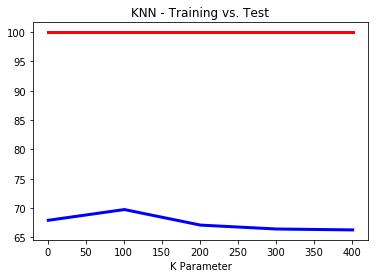

In [155]:
#Find Best Parameters
tuned_params('KNN')

In [156]:
#Run Model
KNN_Model(100, 'uniform')


 Percentage accuracy for K Nearest Neighbors Classifier
68.32971800433839%

 Cross-Validation Score
[0.65092879 0.66563467 0.67364341 0.62945736 0.63953488]

 Confusion Matrix


array([[2153, 1074],
       [ 970, 2257]])



 Program Executed in 0.54


In [157]:
#Run Model
KNN_Model(100, 'distance')


 Percentage accuracy for K Nearest Neighbors Classifier
99.96901146575767%

 Cross-Validation Score
[0.67647059 0.7128483  0.71395349 0.69379845 0.69457364]

 Confusion Matrix


array([[3227,    0],
       [   2, 3225]])



 Program Executed in 0.61


**Random Forest**

In [158]:
#Create function

def RFC_Model(trees, criteria, num_features, depth):
    import timeit
    start = timeit.default_timer()
    rfc = ensemble.RandomForestClassifier(n_estimators=trees, criterion=criteria, max_features=num_features, max_depth=depth)
    rfc.fit(X, Y)
    positive_pred = rfc.predict(X)
    print('\n Percentage accuracy for Random Forest Classifier')
    print(str(rfc.score(X, Y)*100) + '%')
    print('\n Cross-Validation Score')
    print(cross_val_score(rfc, X, Y, cv=5))
    print('\n Confusion Matrix')
    display(confusion_matrix(Y, positive_pred))
    
    #Print time
    stop = timeit.default_timer()
    execution_time = stop - start
    print("\n\n Program Executed in {}".format(round(execution_time, 2)))

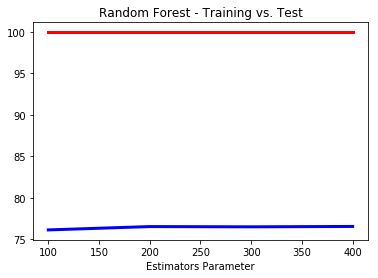

In [159]:
#Find Best Parameters
tuned_params('Random Forest')

In [163]:
#Run Model
RFC_Model(200, 'entropy', 4, 3)


 Percentage accuracy for Random Forest Classifier
77.6262782770375%

 Cross-Validation Score
[0.76006192 0.78947368 0.77751938 0.76124031 0.77054264]

 Confusion Matrix


array([[2249,  978],
       [ 466, 2761]])



 Program Executed in 5.55


**Logistic Regression**

In [164]:
#Create function

def Logistic_Reg_Model(regularization, alpha):
    import timeit
    start = timeit.default_timer()
    if regularization == 'l1':
        lr_lasso = LogisticRegression(penalty=regularization, C=alpha)
        lr_lasso.fit(X, Y)
        positive_pred = lr_lasso.predict(X)
        print('\n Percentage accuracy for Lasso Logistic Regression')
        print(str(lr_lasso.score(X, Y)*100) + '%')
        print('\n Cross-Validation Score')
        print(cross_val_score(lr_lasso, X, Y, cv=5))
        print('\n Confusion Matrix')
        display(confusion_matrix(Y, positive_pred))
        
    elif regularization == 'l2' and alpha == 1e9:
        lr_regular = LogisticRegression(penalty=regularization, C=alpha)
        lr_regular.fit(X, Y)
        positive_pred = lr_regular.predict(X)
        print('\n Percentage accuracy for Logistic Regression')
        print(str(lr_regular.score(X, Y)*100) + '%')
        print('\n Cross-Validation Score')
        print(cross_val_score(lr_regular, X, Y, cv=5))
        print('\n Confusion Matrix')
        display(confusion_matrix(Y, positive_pred))
    else:
        lr_ridge = LogisticRegression(penalty=regularization, C=alpha)
        lr_ridge.fit(X, Y)
        positive_pred = lr_ridge.predict(X)
        print('\n Percentage accuracy for Ridge Logistic Regression')
        print(str(lr_ridge.score(X, Y)*100) + '%')
        print('\n Cross-Validation Score')
        print(cross_val_score(lr_ridge, X, Y, cv=5))
        print('\n Confusion Matrix')
        display(confusion_matrix(Y, positive_pred))
        
     #Print time
    stop = timeit.default_timer()
    execution_time = stop - start
    print("\n\n Program Executed in {}".format(round(execution_time, 2)))

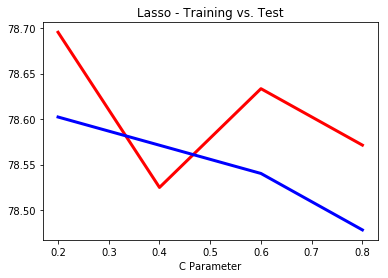

In [165]:
#Find Best Params - Lasso
tuned_params('Lasso')

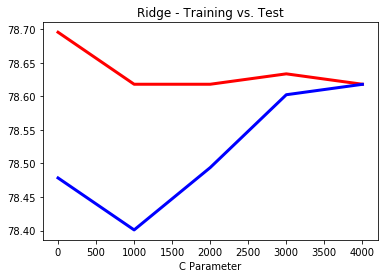

In [166]:
#Find Best Params - Ridge
tuned_params('Ridge')

In [169]:
#Run Lasso Model
Logistic_Reg_Model('l1', 0.35)


 Percentage accuracy for Lasso Logistic Regression
78.6024171056709%

 Cross-Validation Score
[0.77631579 0.7995356  0.79922481 0.77286822 0.78062016]

 Confusion Matrix


array([[2452,  775],
       [ 606, 2621]])



 Program Executed in 0.41


In [173]:
#Run Ridge Model
Logistic_Reg_Model('l2', 4000)


 Percentage accuracy for Ridge Logistic Regression
78.64889990703439%

 Cross-Validation Score
[0.77786378 0.79721362 0.79844961 0.77364341 0.77751938]

 Confusion Matrix


array([[2447,  780],
       [ 598, 2629]])



 Program Executed in 0.25


In [174]:
#Run Regular Logistic Regression
Logistic_Reg_Model('l2', 1e9)


 Percentage accuracy for Logistic Regression
78.75735977688255%

 Cross-Validation Score
[0.77786378 0.79798762 0.79689922 0.7751938  0.77751938]

 Confusion Matrix


array([[2442,  785],
       [ 586, 2641]])



 Program Executed in 0.22


**Support Vector Classifier**

In [175]:
#Create function

def SVC_Model(c, kernel_type):
    import timeit
    start = timeit.default_timer()
    svm = SVC(C=c, kernel=kernel_type)
    svm.fit(X, Y)
    positive_pred = svm.predict(X)
    print('\n Percentage accuracy for SVM')
    print(str(svm.score(X, Y)*100) + '%')
    print('\n Cross-Validation Score')
    print(cross_val_score(svm, X, Y, cv=5))
    print('\n Confusion Matrix')
    display(confusion_matrix(Y, positive_pred))
    
    #Print time
    stop = timeit.default_timer()
    execution_time = stop - start
    print("\n\n Program Executed in {}".format(round(execution_time, 2)))

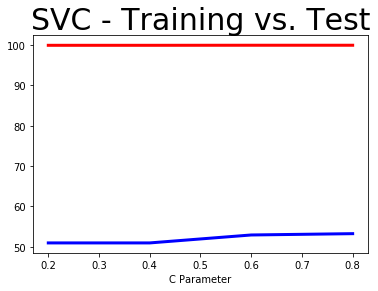

In [176]:
#Find Best Parameters
tuned_params('SVC')

In [177]:
#Run Model
SVC_Model(0.6, 'rbf')


 Percentage accuracy for SVM
99.93802293151533%

 Cross-Validation Score
[0.53250774 0.54566563 0.52325581 0.52325581 0.52248062]

 Confusion Matrix


array([[3225,    2],
       [   2, 3225]])



 Program Executed in 5.9


**Gradient Boosting**

In [178]:
#Create function

def Gradient_Boost_Model(estimators, depth, loss_function, sampling):
    import timeit
    start = timeit.default_timer()
    clf = ensemble.GradientBoostingClassifier(n_estimators=estimators, max_depth=depth, loss=loss_function, subsample=sampling)
    clf.fit(X, Y)
    positive_pred = clf.predict(X)
    print('\n Percentage accuracy for Gradient Boosting Classifier')
    print(str(clf.score(X, Y)*100) + '%')
    print('\n Cross-Validation Score')
    print(cross_val_score(clf, X, Y, cv=5))
    print('\n Confusion Matrix')
    display(confusion_matrix(Y, positive_pred))
    
    #Print time
    stop = timeit.default_timer()
    execution_time = stop - start
    print("\n\n Program Executed in {}".format(round(execution_time, 2)))

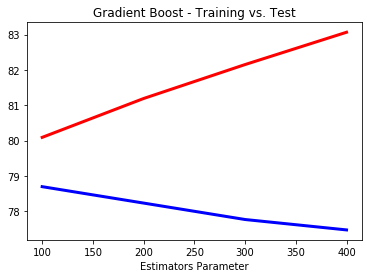

In [179]:
#Find Best Parameters
tuned_params('GB')

In [189]:
#Run Model
Gradient_Boost_Model(100, 2, 'deviance', 0.5)


 Percentage accuracy for Gradient Boosting Classifier
79.54756740006198%

 Cross-Validation Score
[0.77786378 0.80263158 0.79844961 0.76976744 0.7744186 ]

 Confusion Matrix


array([[2483,  744],
       [ 576, 2651]])



 Program Executed in 2.07


## Final Analysis and Results